### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
male_data=pd.read_csv('male_complete.csv')

In [3]:
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [4]:
male_swim = male_data[male_data['Sport'] == 'Athletics']

In [5]:
male_swim['Sport'].describe

<bound method NDFrame.describe of 7392     Athletics
7393     Athletics
7394     Athletics
7395     Athletics
7396     Athletics
           ...    
13649    Athletics
13650    Athletics
13651    Athletics
13652    Athletics
13653    Athletics
Name: Sport, Length: 6262, dtype: object>

In [6]:
male_swim['Medal'].describe

<bound method NDFrame.describe of 7392     NA
7393     NA
7394     NA
7395     NA
7396     NA
         ..
13649    NA
13650    NA
13651    NA
13652    NA
13653    NA
Name: Medal, Length: 6262, dtype: object>

In [7]:
male_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6262 entries, 7392 to 13653
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6262 non-null   int64  
 1   Unnamed: 0_x    6262 non-null   int64  
 2   ID              6262 non-null   int64  
 3   Name            6262 non-null   object 
 4   Sex             6262 non-null   object 
 5   Age             6262 non-null   float64
 6   Height          6262 non-null   float64
 7   Weight          6262 non-null   float64
 8   NOC             6262 non-null   object 
 9   Games           6262 non-null   object 
 10  Year            6262 non-null   int64  
 11  Season          6262 non-null   object 
 12  City            6262 non-null   object 
 13  Sport           6262 non-null   object 
 14  Event           6262 non-null   object 
 15  Medal           6262 non-null   object 
 16  Team            6262 non-null   object 
 17  Unnamed: 0_y    6262 non-null

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(male_swim["Medal"]).astype('category')
X = pd.DataFrame(male_swim[["Age", "Weight", "Height","GDP","Population"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (4696, 1) (4696, 5)
Test Set  : (1566, 1) (1566, 5)


In [10]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [11]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,Medal
7690,28.0,62.0,180.0,4.940000e+12,1.269945e+08,Bronze
11635,23.0,75.0,189.0,4.638601e+10,1.223520e+08,NA
9527,28.0,56.0,166.0,2.260000e+12,1.324171e+09,NA
13413,32.0,68.0,178.0,1.015098e+10,2.728777e+06,NA
11525,20.0,77.0,178.0,1.480017e+10,2.840992e+06,NA
...,...,...,...,...,...,...
11421,20.0,69.0,186.0,4.740722e+10,9.507120e+06,NA
11686,26.0,60.0,177.0,8.640000e+11,7.951243e+07,NA
10825,26.0,79.0,184.0,1.830000e+12,1.263066e+09,NA
12532,21.0,55.0,165.0,1.484093e+09,4.936300e+05,NA


In [12]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        5786
Gold       164
Silver     157
Bronze     155
Name: Medal, dtype: int64


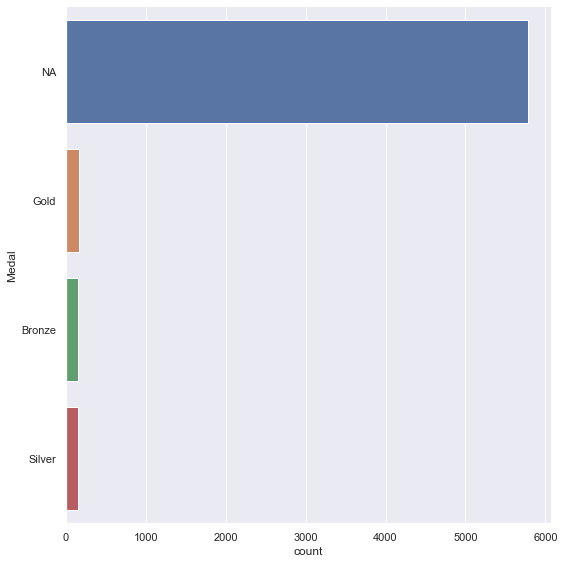

In [13]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(male_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(male_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = male_swim, kind = "count", height = 8)

In [14]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(4696, 5) (4696, 1)


In [15]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(17328, 5) (17328, 1)


In [16]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,Medal
0,28.000000,62.000000,180.000000,4.940000e+12,1.269945e+08,Bronze
1,23.000000,75.000000,189.000000,4.638601e+10,1.223520e+08,NA
2,28.000000,56.000000,166.000000,2.260000e+12,1.324171e+09,NA
3,32.000000,68.000000,178.000000,1.015098e+10,2.728777e+06,NA
4,20.000000,77.000000,178.000000,1.480017e+10,2.840992e+06,NA
...,...,...,...,...,...,...
17323,24.855177,83.082789,184.517258,8.247000e+09,3.436800e+05,Silver
17324,27.813207,64.186793,179.186793,5.160934e+10,4.023989e+07,Silver
17325,21.061883,72.182359,178.436472,1.520517e+10,1.292073e+07,Silver
17326,26.211389,78.577223,184.788611,8.929376e+09,2.656864e+06,Silver


In [17]:
X_test

,Age,Weight,Height,GDP,Population
8979,29.0,78.0,181.0,1.930000e+11,10746740.0
11317,25.0,64.0,177.0,2.680000e+12,65659790.0
9691,28.0,75.0,183.0,1.030000e+13,282162411.0
8618,22.0,64.0,173.0,1.126180e+10,377923.0
8437,28.0,76.0,183.0,1.405691e+10,2881355.0
...,...,...,...,...,...
8439,20.0,60.0,170.0,1.140000e+12,56942108.0
11412,27.0,71.0,188.0,2.870000e+11,49557573.3
12564,29.0,78.0,186.0,3.447023e+10,1997012.0
10112,24.0,55.0,160.0,1.150000e+11,1389342.0


Number of Medal Types : 4
Bronze    4332
Gold      4332
NA        4332
Silver    4332
Name: Medal, dtype: int64


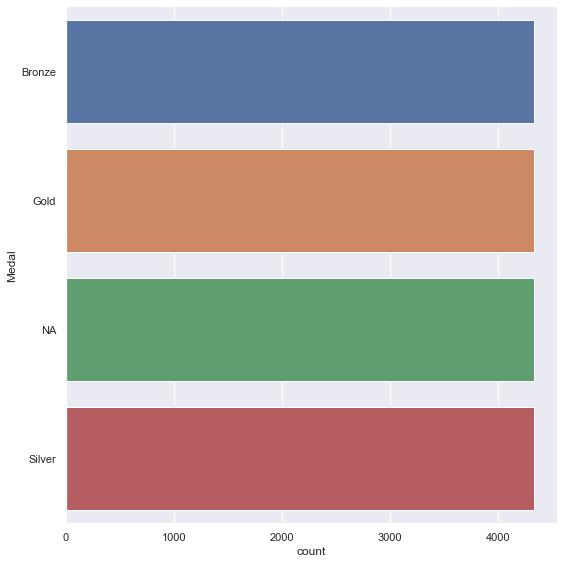

In [18]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (12996, 1) (12996, 5)
Test Set  : (4332, 1) (4332, 5)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8511849799938442

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8104801477377654



<AxesSubplot:>

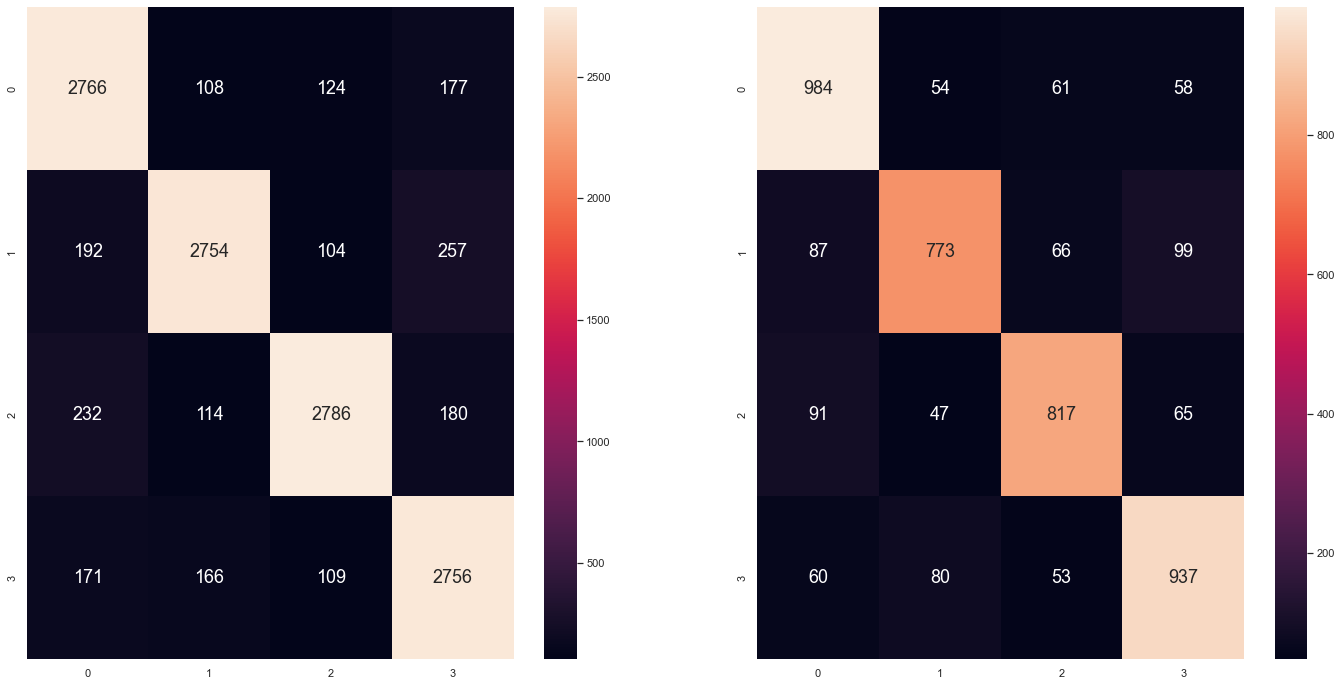

In [19]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

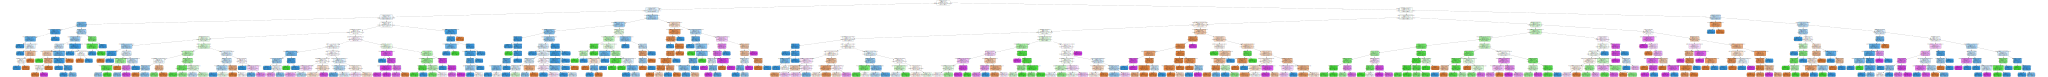

In [20]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [21]:
#graph.render("Tree_new")

### Predictions

In [22]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.7305236270753512


<AxesSubplot:>

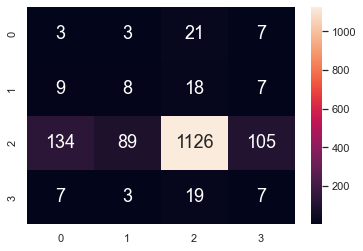

In [23]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})